In [2]:
import shap
X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)
feature_names = list(X.columns)
feature_names

['Age',
 'Workclass',
 'Education-Num',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital Gain',
 'Capital Loss',
 'Hours per week',
 'Country']

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581646,3.868892,10.080679,2.611836,6.572740,2.494518,3.665858,0.669205,1077.648804,87.303833,40.437454,36.718866
std,13.640432,1.455960,2.572720,1.506222,4.228857,1.758232,0.848806,0.470506,7385.291992,402.960205,12.347429,7.823782
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000
50%,37.000000,4.000000,10.000000,2.000000,7.000000,3.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000
75%,48.000000,4.000000,12.000000,4.000000,10.000000,4.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000
max,90.000000,8.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


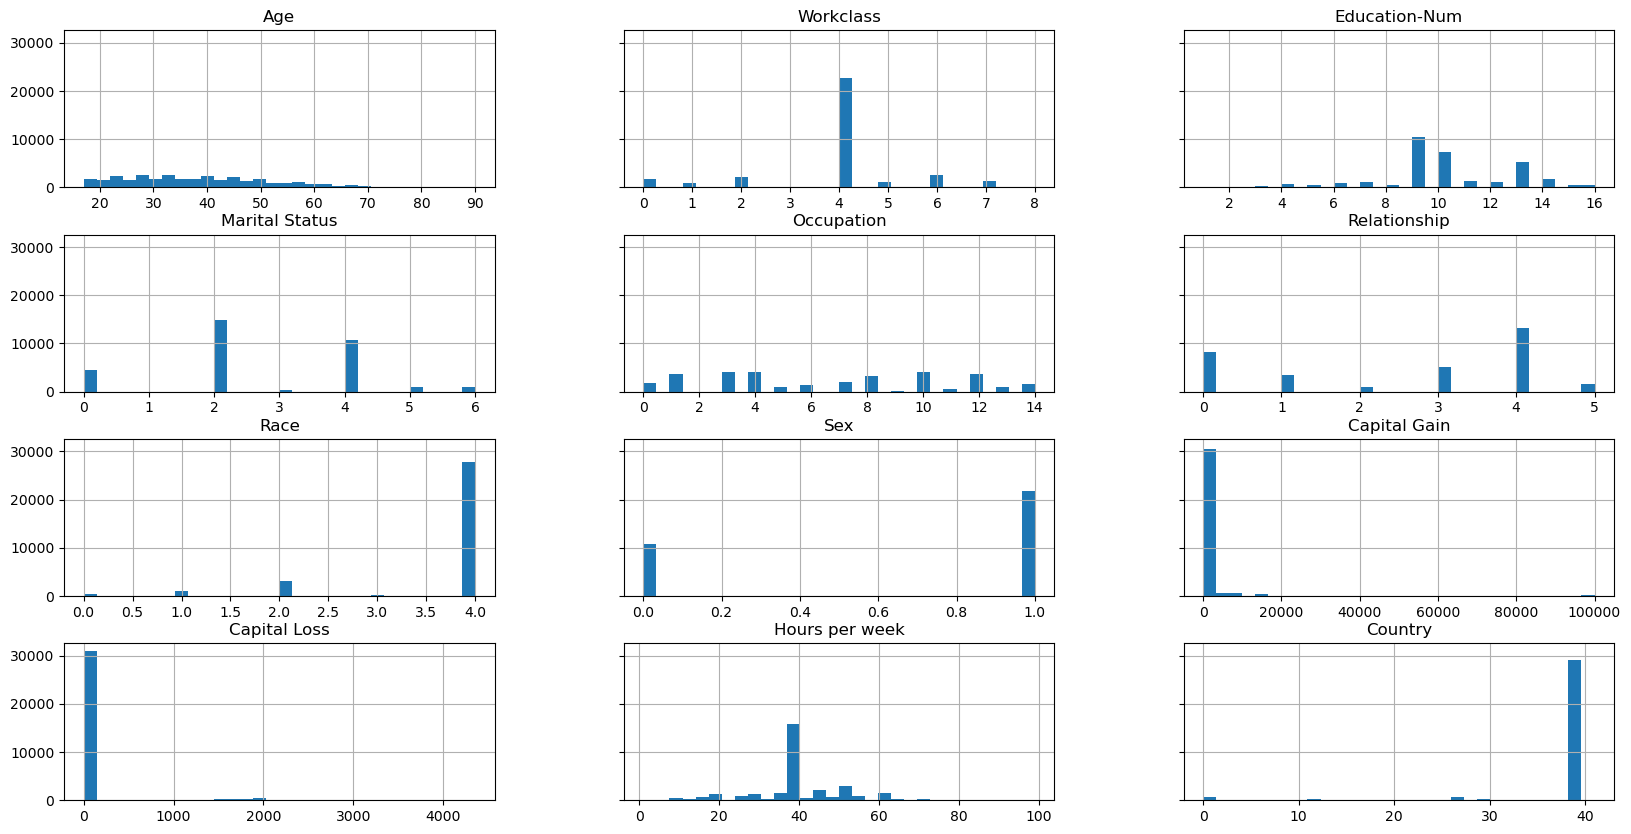

In [5]:
display(X.describe())
hist = X.hist(bins=30, sharey=True, figsize=(20, 10))

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_display = X_display.loc[X_train.index]

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
X_train_display = X_display_loc[X_train.index]
X_val_display = X_display.loc[X_val.index]

NameError: name 'X_display_loc' is not defined

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
X_train_display = X_display.loc[X_train.index]
X_val_display = X_display.loc[X_val.index]

In [15]:
import pandas as pd
train = pd.concat([pd.Series(y_train, index=X_train.index, name='Income>50k', dtype=int), X_train], axis=1)
validation = pd.concat([pd.Series(y_val, index=X_val.index, name='Income>50k', dtype=int), X_val], axis=1)
test = pd.concat([pd.Series(y_test, index=X_test.index, name='Income>50k', dtype=int), X_test], axis=1)

In [16]:
train

,Income>50k,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
13825,0,54.0,6,6.0,2,3,4,4,1,0.0,0.0,36.0,39
2843,1,41.0,2,10.0,2,8,4,4,1,0.0,1485.0,40.0,39
3112,0,24.0,4,9.0,4,1,3,4,1,0.0,0.0,40.0,39
10886,0,33.0,4,12.0,0,7,0,4,0,0.0,0.0,42.0,39
12148,1,33.0,4,9.0,2,1,5,4,0,0.0,1887.0,20.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,56.0,4,9.0,2,1,4,4,1,0.0,0.0,35.0,0
10156,0,28.0,4,9.0,4,6,3,4,1,0.0,0.0,40.0,39
21991,0,35.0,4,9.0,2,6,4,4,1,0.0,0.0,40.0,26
342,1,36.0,7,9.0,2,11,4,4,1,7298.0,0.0,40.0,39


In [17]:
validation

,Income>50k,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
22308,0,24.0,4,10.0,4,6,3,4,1,0.0,0.0,40.0,39
8499,0,66.0,0,10.0,2,0,4,4,1,0.0,0.0,40.0,39
27309,0,38.0,4,8.0,4,7,0,2,0,0.0,0.0,50.0,39
18937,0,21.0,4,8.0,4,6,3,4,1,0.0,0.0,32.0,39
30262,0,30.0,4,10.0,4,4,0,4,1,0.0,0.0,52.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21639,0,33.0,4,11.0,2,1,5,2,0,0.0,0.0,40.0,39
28968,0,29.0,4,4.0,0,3,1,4,0,0.0,0.0,55.0,39
21714,0,28.0,4,5.0,4,8,2,4,1,0.0,0.0,52.0,39
12412,1,39.0,2,8.0,2,14,4,4,1,0.0,1848.0,40.0,27


In [18]:
test

,Income>50k,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
9646,0,62.0,6,4.0,6,8,0,4,0,0.0,0.0,66.0,39
709,0,18.0,4,7.0,4,8,2,4,1,0.0,0.0,25.0,39
7385,1,25.0,4,13.0,4,5,3,4,1,27828.0,0.0,50.0,39
16671,0,33.0,4,9.0,2,10,4,4,1,0.0,0.0,40.0,39
21932,0,36.0,4,7.0,4,7,1,4,0,0.0,0.0,40.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5889,1,39.0,4,13.0,2,10,5,4,0,0.0,0.0,20.0,39
25723,0,17.0,4,6.0,4,12,3,4,0,0.0,0.0,20.0,39
29514,0,35.0,4,9.0,4,14,3,4,1,0.0,0.0,40.0,39
1600,0,30.0,4,7.0,2,3,4,4,1,0.0,0.0,45.0,39


In [19]:
train.to_csv('train.csv', index=False, header=False)
validation.to_csv('validation.csv', index=False, header=False)

In [23]:
import sagemaker, boto3, os
bucket = sagemaker.Sessions().default_bucket()
prefix = "demo-sagemaker-xgboost-adult-income-prediction"

boto3.Sessions().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'data/train.csv')).upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'data/validation.csv')).upload_file('validation.csv')

ModuleNotFoundError: No module named 'sagemaker'

In [24]:
! aws s3 ls {bucket}/{prefix}/data --recursive


Parameter validation failed:
Invalid bucket name "{bucket}": Bucket name must match the regex "^[a-zA-Z0-9.\-_]{1,255}$" or be an ARN matching the regex "^arn:(aws).*:(s3|s3-object-lambda):[a-z\-0-9]*:[0-9]{12}:accesspoint[/:][a-zA-Z0-9\-.]{1,63}$|^arn:(aws).*:s3-outposts:[a-z\-0-9]+:[0-9]{12}:outpost[/:][a-zA-Z0-9\-]{1,63}[/:]accesspoint[/:][a-zA-Z0-9\-]{1,63}$"
